# Figure 4

In [1]:
import sys
sys.path.append('..')
sys.path.append('../graybox')

from db import *
from analysis import *
from information_theory import find_best_split, remove_outliers_iqr

In [10]:
df = (
    pd.read_csv('../../datasets/graybox/graybox_baseline_stats.csv')
)

stats = [
    "prompt_revision_time",
    "dalle_tool_time",
    "total_time",
    "revised_prompt_tokens_per_second",
]

stat = stats[2]
model = "gpt-4o"

df = df.copy()
df = (
    df
    [df["response_type"] == "success"]
    [df["model_slug"] == model]
    .pipe(remove_outliers_iqr, stat)
)

print(f'Range: {df[stat].min()} - {df[stat].max()}')

Removed 16 outliers from column 'total_time'
Range: 4.036746978759766 - 10.343591928482056


/tmp/ipykernel_1238212/2578494674.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df


Using optimal split: 4.817390561103821 (information_gain = 0.9473029652004117)


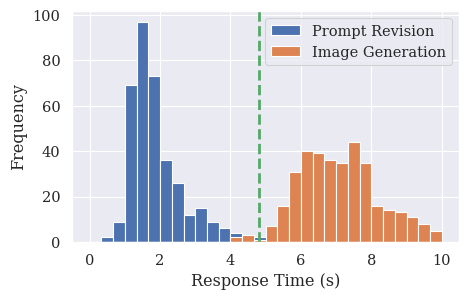

In [12]:
X = np.array(
    [[i] for i in list(df["prompt_revision_time"])]
    + [[i] for i in list(df["total_time"])]
)
Y = np.array(
    ["revising" for _ in range(len(df["prompt_revision_time"]))]
    + ["dalle" for _ in range(len(df["total_time"]))]
)
best_feature, best_value, best_gain = find_best_split(X, Y)
print(f"Using optimal split: {best_value} (information_gain = {best_gain})")

fig, ax = plt.subplots(figsize=(5,3))

fixed_range = (0, 10)
ax.hist(df["prompt_revision_time"], bins=30, label="Prompt Revision", color=palette[0], range=fixed_range)
ax.hist(df["total_time"], bins=30, label="Image Generation", color=palette[1], range=fixed_range)
ax.axvline(x=best_value, color=palette[2], linestyle="--", linewidth=2)

ax.set_xlabel("Response Time (s)")
ax.set_ylabel("Frequency")

ax.legend()

plt.show()